In [ ]:
import yfinance as yf
import pandas as pd

stocks = ['YELP','MTCH', 'ZG','TTD', 'EA','PYPL', 'BABA','INTC', 'CRM','AMD', 'TSLA','META', 'AMZN','NVDA', 'GOOG','AAPL', 'MSFT']
for stock in stocks:
  stock_ticker = stock
  csv_file_path = f'/content/{stock_ticker}.csv'

  stock_data = pd.read_csv(csv_file_path)

  stock_data['Date'] = pd.to_datetime(stock_data['Date'])

  columns_to_drop = ['Adj Close']
  stock_data.drop(columns=columns_to_drop, inplace=True)

  new_csv_file_path = f'/content/{stock_ticker}__modified.csv'
  stock_data.to_csv(new_csv_file_path, index=False)
  print(f"New CSV with added financial data saved as: {new_csv_file_path}")


New CSV with added financial data saved as: /content/YELP__modified.csv
New CSV with added financial data saved as: /content/MTCH__modified.csv
New CSV with added financial data saved as: /content/ZG__modified.csv
New CSV with added financial data saved as: /content/TTD__modified.csv
New CSV with added financial data saved as: /content/EA__modified.csv
New CSV with added financial data saved as: /content/PYPL__modified.csv
New CSV with added financial data saved as: /content/BABA__modified.csv
New CSV with added financial data saved as: /content/INTC__modified.csv
New CSV with added financial data saved as: /content/CRM__modified.csv
New CSV with added financial data saved as: /content/AMD__modified.csv
New CSV with added financial data saved as: /content/TSLA__modified.csv
New CSV with added financial data saved as: /content/META__modified.csv
New CSV with added financial data saved as: /content/AMZN__modified.csv
New CSV with added financial data saved as: /content/NVDA__modified.csv

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
columns_to_drop = ['Adj Close','Date']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...,...
10878,2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
10879,2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000
10880,2024-02-09,188.649994,189.990005,188.000000,188.850006,188.850006,45099900
10881,2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900


In [ ]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns=columns_to_drop, inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...
2024-02-07,190.639999,191.050003,188.610001,189.410004,53439000
2024-02-08,189.389999,189.539993,187.350006,188.320007,40962000
2024-02-09,188.649994,189.990005,188.000000,188.850006,45099900


<Axes: xlabel='Date'>

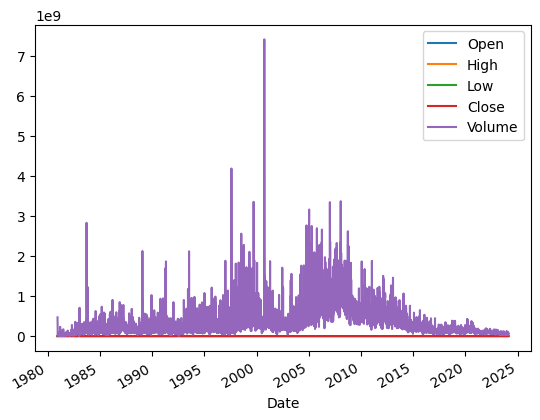

In [ ]:
stockprice = df
stockprice.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=100):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X1, y1 = df_to_X_y(stockprice, 100)
X1.shape, y1.shape

((10783, 100, 5), (10783,))

In [ ]:
X_train1, y_train1 = X1[:9000], y1[:9000]
X_val1, y_val1 = X1[9000:9900], y1[9000:9900]
X_test1, y_test1 = X1[9900:], y1[9900:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((9000, 100, 5), (9000,), (900, 100, 5), (900,), (883, 100, 5), (883,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((100, 5)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [1]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

282/282 [==============================] - 4s 14ms/step


,Train Predictions,Actuals
0,0.128027,0.123884
1,0.127745,0.125000
2,0.128542,0.122210
3,0.127812,0.122210
4,0.127271,0.121652
...,...,...
8995,28.791714,29.152500
8996,28.926914,29.477501
8997,29.224531,29.747499
8998,29.465500,29.777500


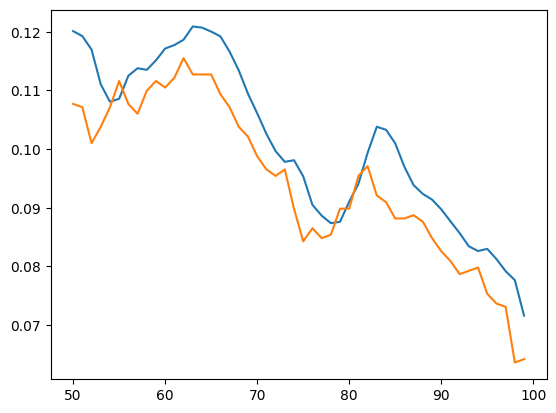

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

29/29 [==============================] - 0s 14ms/step


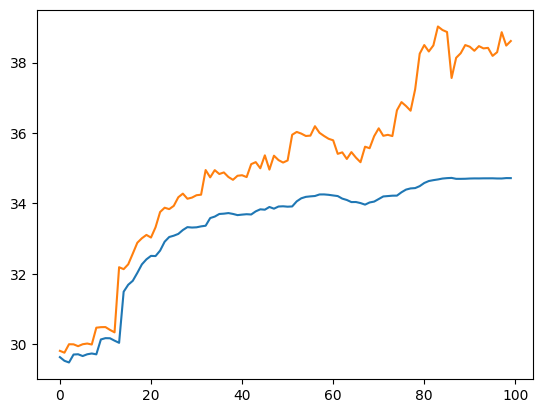

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})

plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
